In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
diabetes=pd.read_csv('diabetes.csv')
print('The first 5 observation of the diabetes dataset:\n',diabetes.head(5))

The first 5 observation of the diabetes dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#The Data info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking the columns
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Checking the data types the variables
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
#checking for missing values
print('Below are the missing values:\n',diabetes.isnull().sum())

Below are the missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
#Description of the Data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


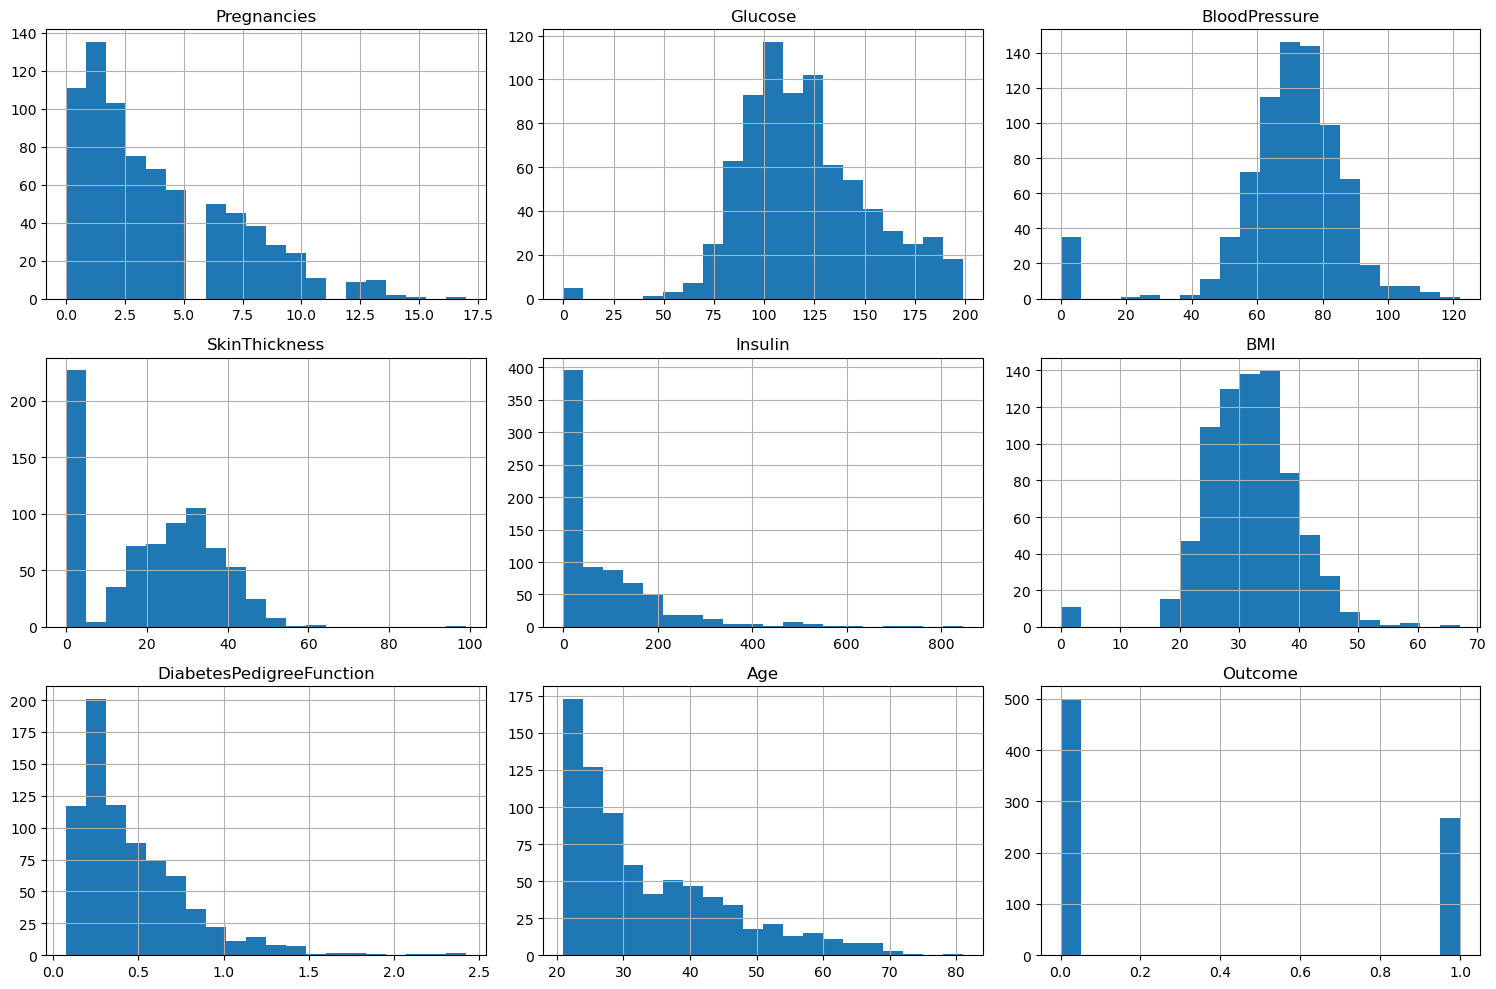

In [12]:
#Visualizing the distributions of the features.
diabetes.hist(bins=20,figsize=(15,10))
plt.tight_layout()
plt.show()

In [13]:
#Visualizing the number of people that have the diabetes and those that don't have
with_and_without=diabetes['Outcome'].value_counts()
print(with_and_without)

Outcome
0    500
1    268
Name: count, dtype: int64


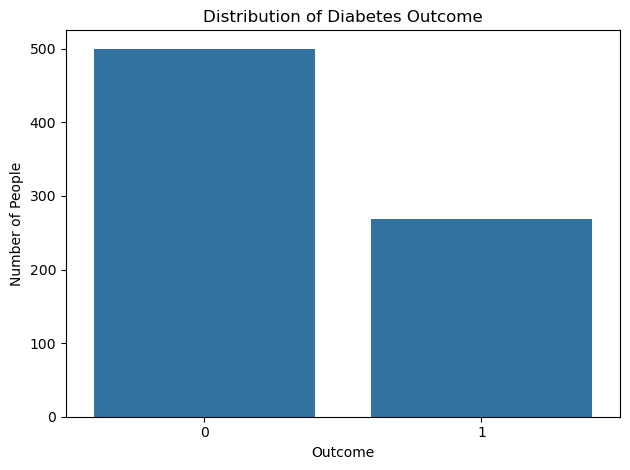

In [21]:
sns.barplot(with_and_without)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

In [24]:
#Checking the features correlations
correlations=diabetes.corr()
print('Here is how the features are correlated with one another:\n',correlations)

Here is how the features are correlated with one another:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683            

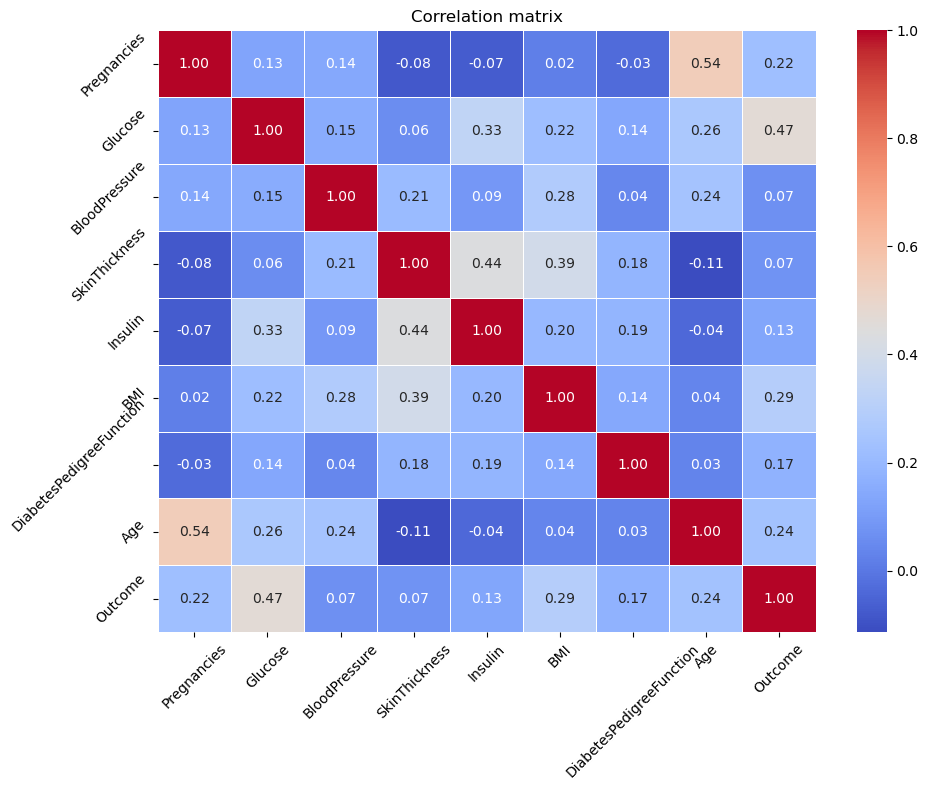

In [27]:
#Visualizing the heatmap of the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlations,annot=True,fmt='.2f',cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [ ]:
#Building the Random Foreat Model
#Splitting the data into training and testing size.
X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#Checking the number of observations that are used for the model training and testing
print(f'The training data is:{X_train.shape} \n The testing data is:{X_test.shape}')

The training data is:(614, 8) 
 The testing data is:(154, 8)


In [33]:
#Lets Scale the data before
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)

In [36]:
#lets now build the model using the scaled data.
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [40]:
#Predicting the Outcomes using the testing data.
y_pred=model.predict(X_test_scaled)

In [41]:
#Evaluating the model accuracy.
accuracy=accuracy_score(y_test,y_pred)
print('This is the models accuracy:\n',accuracy)

This is the models accuracy:
 0.7597402597402597


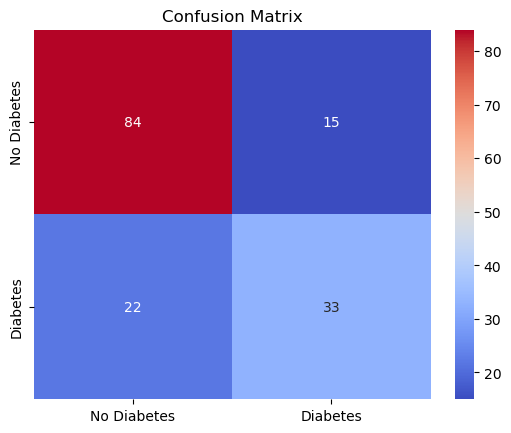

In [43]:
#Visualizing the model's confusion matrix.
confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m,annot=True,fmt='d',cmap='coolwarm',xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix')
plt.show().